<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS3_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

**Look at data**

In [3]:
df.head()


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"




---



**Create Crosstab**

In [0]:
cross = pd.crosstab(df['Year'], df['Occupation'], values=None, normalize='index')

In [60]:
cross.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361




---



**Extra Analysis**

In [118]:
df.describe(exclude='number')

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
count,2667,2693,2662,2693,2693
unique,398,2639,17,1669,4
top,actor,12/18/13,Acting,Fareed Zakaria,"Acting, Comedy & Music"
freq,596,3,930,19,1203




---



# Part 2 — Recreate this explanatory visualization:

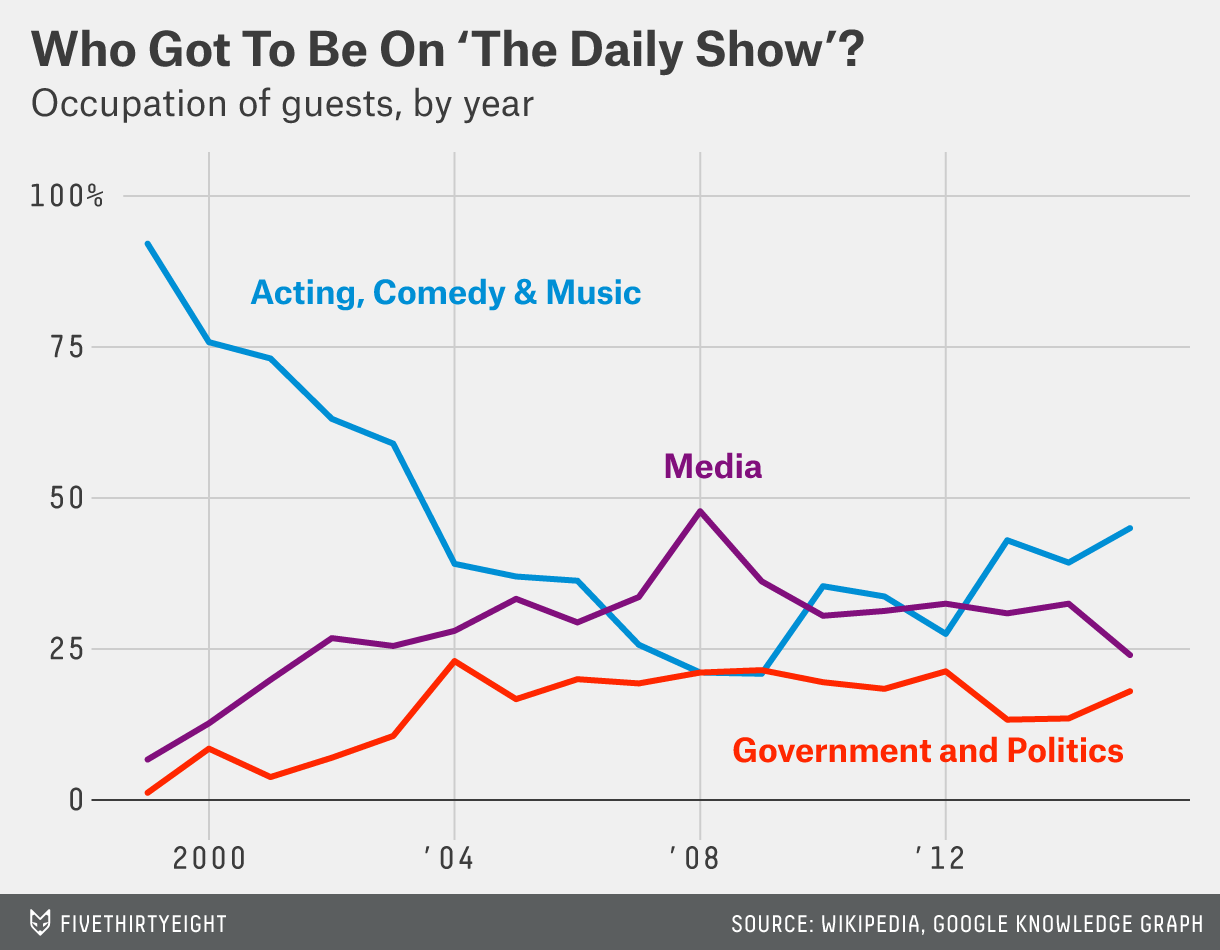

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Ripoff 538's Plot**

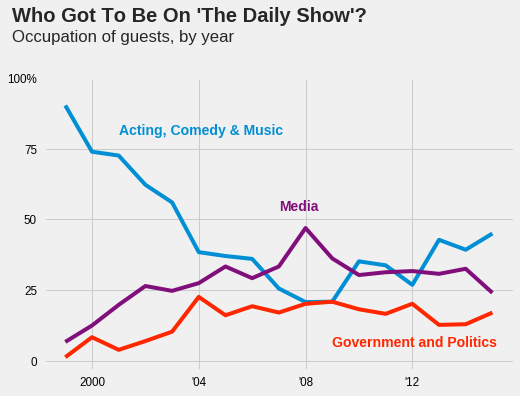

In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 7.5, 5

plt.style.use('fivethirtyeight')

# Acting Comedy and Music
p1 = plt.plot(cross.index, cross['Acting, Comedy & Music'],color='#008FD5')
plt.text(x = 2001, y=.8 , s = "Acting, Comedy & Music", color='#008FD5', fontweight='bold')

#Media
p2 = plt.plot(cross.index, cross['Media'], color='#810F7B')
plt.text(x = 2007, y=.53 , s = "Media", color='#810F7B', fontweight='bold')

#Liars...I mean Government and Politics
p3 = plt.plot(cross.index, cross['Government and Politics'], color='#FF2600')
plt.text(x = 2009, y=.05 , s = "Government and Politics", color='#FF2600', fontweight='bold')

# Title and Subtitle
plt.text(x = 1997, y=1.20 , s = "Who Got To Be On 'The Daily Show'?", fontsize='x-large', fontweight='bold')
plt.text(x = 1997, y=1.13 , s = "Occupation of guests, by year", fontweight=25, fontsize='large')

# Work the Axis
plt.xticks([2000, 2004, 2008, 2012], ['2000', "'04", "'08", "'12"], color='black', fontsize='small')
plt.yticks([0, .25, .50, .75, 1], ['0', '25', '50', '75', '100%'], color='black', fontsize='small')

plt.show()



---



**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

**Find Top Ten and Plot Em**

In [80]:
guests = df['Guest'].value_counts()
top_ten_guests = guests[:10]
top_ten_guests

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Tom Brokaw        12
Bill O'Reilly     10
Richard Lewis     10
Reza Aslan        10
Will Ferrell      10
Name: Guest, dtype: int64

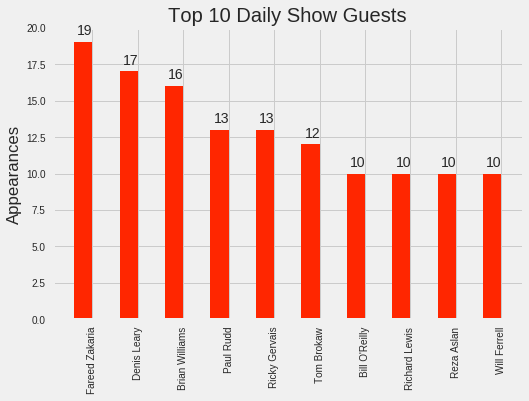

In [114]:

ind = np.arange(len(top_ten_guests))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, top_ten_guests, width,
                color='#FF2600')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Appearances')
ax.set_title('Top 10 Daily Show Guests')
ax.set_xticks(ind)
ax.set_xticklabels(('Fareed Zakaria', 'Denis Leary', 'Brian Williams',
                    'Paul Rudd', 'Ricky Gervais', 'Tom Brokaw', "Bill O'Reilly",
                    'Richard Lewis','Reza Aslan', 'Will Ferrell'), rotation=90)
plt.ylim(0, 20)

# Annotations
plt.text(x=-.35, y=19.5, s='19')
plt.text(x=.67, y=17.5, s='17')
plt.text(x=1.67, y=16.5, s='16')
plt.text(x=2.67, y=13.5, s='13')
plt.text(x=3.67, y=13.5, s='13')
plt.text(x=4.67, y=12.5, s='12')
plt.text(x=5.67, y=10.5, s='10')
plt.text(x=6.67, y=10.5, s='10')
plt.text(x=7.67, y=10.5, s='10')
plt.text(x=8.67, y=10.5, s='10')

plt.show();



---

